<a href="https://colab.research.google.com/github/NaithaniAR/Web-scraping-for-reddit/blob/main/Web_scraping_for_reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 8.1 MB/s 


In [ ]:
pip install praw

     |████████████████████████████████| 176 kB 7.8 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import nltk
import nltk.sentiment.vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

#import SentimetIntensityAnalyzer as SIA
import seaborn as sns
from IPython import display 
from pprint import pprint
import praw
import matplotlib.pyplot as plt
import math


In [ ]:
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

reddit = praw.Reddit( client_id ="Put client ID here  #",
                      client_secret = "# Put Client secret here #",                        
                      user_agent = "ME_jovial")

In [ ]:
headlines = set()

for sub in reddit.subreddit("india").new(limit=None):
 headlines.add(sub.title)

print(len(headlines))

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readt

894


In [ ]:
sia= SIA()
results = []
for line in headlines:
    scores = sia.polarity_scores (line)
    scores['headline'] = line
    results.append(scores)

df=pd.DataFrame.from_records (results)

df.head()

,neg,neu,pos,compound,headline
0,0.600,0.400,0.000,-0.7184,Indian lawyers are useless and arrogant
1,0.000,1.000,0.000,0.0000,I'm so done with life
2,0.000,1.000,0.000,0.0000,"Stalin completes one year as TN CM, announces ..."
3,0.179,0.578,0.243,0.2732,12 years old relationship came to end with my ...
4,0.000,0.714,0.286,0.6808,Girls have all the advantage in our society if...


In [ ]:
df.shape

(894, 5)

In [ ]:
df["label"] = 0

df.loc[df["compound"]> 0.1,'label'] =1
df.loc[df["compound"]< 0.1,'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.600,0.400,0.000,-0.7184,Indian lawyers are useless and arrogant,-1
1,0.000,1.000,0.000,0.0000,I'm so done with life,-1
2,0.000,1.000,0.000,0.0000,"Stalin completes one year as TN CM, announces ...",-1
3,0.179,0.578,0.243,0.2732,12 years old relationship came to end with my ...,1
4,0.000,0.714,0.286,0.6808,Girls have all the advantage in our society if...,1


In [ ]:
df[df['label'] == 1].headline

3      12 years old relationship came to end with my ...
4      Girls have all the advantage in our society if...
10     Noted athletes like Abhinav Bindra and Rohit S...
12     Stopped taking precautions because others used...
13     IPL 2022: KKR's Pat Cummins is bowled over by ...
                             ...                        
872    As DMK govt bans mutt ritual, rationalists and...
879     Can someone please recommend a mobile under 17k?
881              How do you choose a perfect watermelon?
886    Sorry for the quora-type question, but do any ...
888    Germany to commit €10 bn more as assistance to...
Name: headline, Length: 255, dtype: object

In [ ]:
print("positive headlines: \n") 
pprint (list (df[df['label'] == 1].headline)[:5],width = 100)

print("negative headlines: \n") 
pprint (list (df[df['label'] == -1].headline)[:5],width = 100)


positive headlines: 

["Indian Devs contributing to KDE SoK'22 #proud",
 'Is Air Fryer useful? Does the food taste the same?',
 'How do you wash the clothes you wear for workouts? Hand wash or machine wash?',
 'Are we dome with covid or just the people not taking it seriously anymore?',
 'I found this mini treasure at my home today. Any suggestions?']
negative headlines: 

['Any advice for an interview at NID?',
 'CA Final Student looking for advice!',
 'Court commissioner surveys area outside Gyanvapi Mosque',
 'My question is for the NRIs and the Indian students in foreign countries...',
 'Miami Formula1 Race 2022…Where can I watch it on TV in India?']


In [ ]:
print(df.label.value_counts()) 
print(df.label.value_counts(normalize=True)* 100)

-1    638
 1    258
Name: label, dtype: int64
-1    71.205357
 1    28.794643
Name: label, dtype: float64


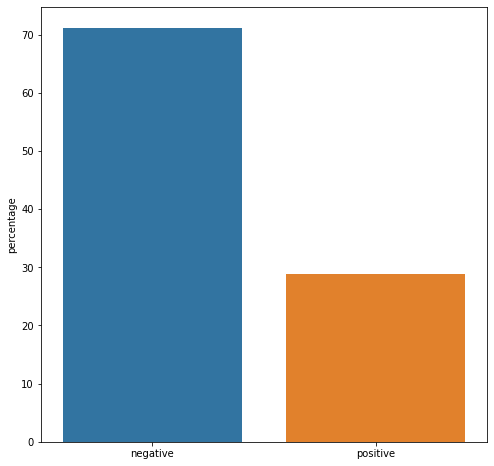

In [ ]:
fig, ax = plt.subplots (figsize =(8,8))

counts = df.label.value_counts (normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['negative','positive'])
ax.set_ylabel("percentage")
plt.show()

In [ ]:
from nltk. tokenize import word_tokenize, RegexpTokenizer 
from nltk.corpus import stopwords 
tokenizer= RegexpTokenizer (r"\w+")

In [ ]:
stop_words = stopwords.words('english')

def process_text (headlines):
 tokens = []
 for line in headlines:
    toks= tokenizer.tokenize(line)
    toks= [t.lower() for t in toks if t.lower() not in stop_words]
    tokens.extend (toks)
 return tokens

In [ ]:
pos_lines= list(df[df.label==1].headline)
pos_tokens = process_text(pos_lines) 
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(10)

[('india', 49),
 ('help', 33),
 ('indian', 25),
 ('please', 23),
 ('like', 17),
 ('need', 13),
 ('people', 12),
 ('get', 11),
 ('press', 11),
 ('best', 10)]

In [ ]:
pos_lines= list(df[df.label== -1].headline)
pos_tokens = process_text(pos_lines) 
pos_freq = nltk.FreqDist(pos_tokens)
pos_freq.most_common(10)

[('india', 121),
 ('indian', 45),
 ('delhi', 19),
 ('bjp', 17),
 ('police', 16),
 ('new', 15),
 ('get', 14),
 ('need', 14),
 ('women', 14),
 ('one', 13)]

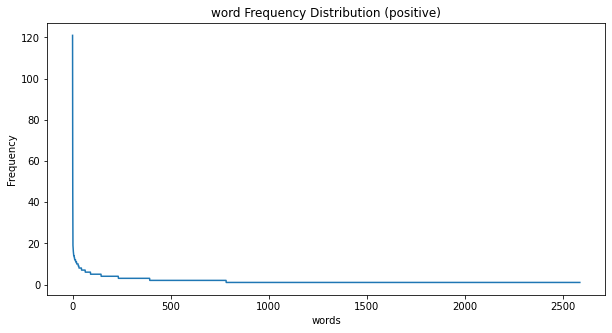

In [ ]:
y_val= [x[1] for x in pos_freq.most_common()] 

fig= plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("words") 
plt.ylabel("Frequency")

plt.title("word Frequency Distribution (positive)")

plt.show()

<function matplotlib.pyplot.show>

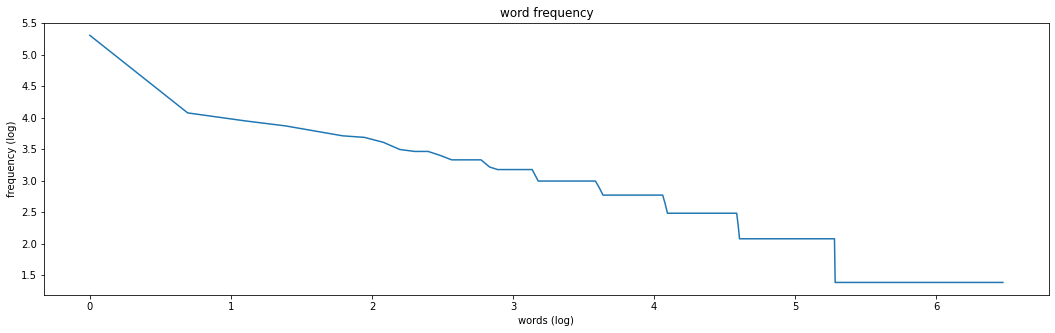

In [ ]:
y_final = []

for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
   y_final.append(math.log(i + k + z +t ))
x_val= [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(18,5))

plt.xlabel("words (log)")

plt.ylabel("frequency (log)" )
plt.title("word frequency")

plt.plot(x_val, y_final)

plt.show

